<a href="https://www.analytiksinc.com">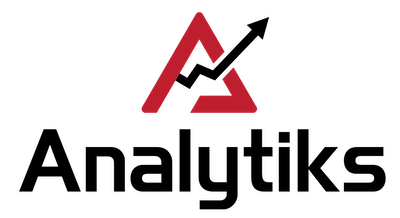</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# GBM Classification with GridSearchCV

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html">GradientBoostingClassifier</a>

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV

## Load dataset

<b>Dataset:</b> <i>Churn_Cleaned.csv</i>

In [11]:
#Provide the path of the dataset
df = pd.read_csv("Exercises/Churn_Cleaned.csv", index_col=0)

In [12]:
#Inspect the Dataset
df.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Churn_True.
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [13]:
#Describe the Dataset Object
df.describe(include='all')

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Churn_True.
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,...,0.019802,0.023402,0.031803,0.023102,0.251425,0.496550,0.252025,0.096910,0.276628,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,...,0.139340,0.151200,0.175502,0.150251,0.433897,0.500063,0.434241,0.295879,0.447398,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Separate predictor & target variables

In [14]:
X = df.drop("Churn_True.", axis=1)
y = df["Churn_True."]

### Check class balance

In [15]:
y.value_counts()

0.0    2850
1.0     483
Name: Churn_True., dtype: int64

## Grid Search 1 - Identify best Number of estimators

### Setup Grid Search CV with GBM Classifier

In [16]:
# Test with One Parameter: n_estimators
param_test1 = {'n_estimators':range(10,61,10)}

In [17]:
# min_samples_split : in general 0.5% - 1% of total values
# min_samples_leaf : based on intuition

clf = GradientBoostingClassifier(learning_rate=0.1, 
                                 min_samples_split=30,
                                 min_samples_leaf=3,
                                 max_depth=10,
                                 max_features='sqrt',
                                 subsample=0.8,
                                 random_state=10)

In [18]:
#Create the GridSearchCV
gs1 = GridSearchCV(estimator = clf, 
                        param_grid = param_test1, 
                        scoring='accuracy',
                        n_jobs=4,
                        iid=False, 
                        cv=3)

### Build Model

Grid Search will build models for various # of estimators

In [19]:
gs1.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(10, 61, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

### Inspect Best Scoring Model Results

In [20]:
scores_df = pd.DataFrame(gs1.cv_results_).sort_values("rank_test_score")

In [21]:
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
5,0.380314,0.037178,0.004655,0.000470,60,{'n_estimators': 60},0.938794,0.950495,0.941494,0.943594,0.005002,1,0.990099,0.989649,0.987399,0.989049,0.001181
4,0.362695,0.006166,0.005320,0.000470,50,{'n_estimators': 50},0.939694,0.953195,0.936094,0.942994,0.007361,2,0.988299,0.984248,0.983798,0.985449,0.002024
3,0.288894,0.008318,0.003989,0.000001,40,{'n_estimators': 40},0.933393,0.952295,0.936094,0.940594,0.008347,3,0.982898,0.981548,0.981098,0.981848,0.000765
2,0.236700,0.009715,0.003990,0.000814,30,{'n_estimators': 30},0.927993,0.944194,0.927093,0.933093,0.007858,4,0.979298,0.977498,0.978398,0.978398,0.000735
1,0.182511,0.004308,0.003658,0.000470,20,{'n_estimators': 20},0.920792,0.932493,0.918092,0.923792,0.006250,5,0.970747,0.964896,0.965347,0.966997,0.002658
0,0.093085,0.009543,0.003324,0.000470,10,{'n_estimators': 10},0.890189,0.885689,0.884788,0.886889,0.002362,6,0.923492,0.917192,0.914491,0.918392,0.003771


In [22]:
print("Best estimator:")
print(gs1.best_estimator_)
print("Best parameters:")
print(gs1.best_params_)
print("Best score:")
print(gs1.best_score_)

Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=30,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Best parameters:
{'n_estimators': 60}
Best score:
0.9435943594359436


## Grid Search 2 - Tune tree-specific parameters
* max_depth
* num_samples_split


### Setup Grid Search CV with GBM Classifier

In [23]:
param_test2 = {'max_depth':range(10,21,2), 
               'min_samples_split':range(30,81,5)}

In [24]:
clf = GradientBoostingClassifier(learning_rate=0.1, 
                                 n_estimators=50, 
                                 max_features='sqrt', 
                                 subsample=0.8, 
                                 random_state=10)

In [25]:
gs2 = GridSearchCV(estimator =  clf,
                   param_grid = param_test2, 
                   scoring='accuracy',
                   n_jobs=4,
                   iid=False, 
                   cv=3)

### Build the Model

In [26]:
gs2.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(10, 21, 2), 'min_samples_split': range(30, 81, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

### Inspect Best Scoring Model Results

In [27]:
print("Best estimator:")
print(gs2.best_estimator_)
print("Best parameters:")
print(gs2.best_params_)
print("Best score:")
print(gs2.best_score_)

Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Best parameters:
{'max_depth': 10, 'min_samples_split': 50}
Best score:
0.9468946894689468


In [28]:
scores_df = pd.DataFrame(gs2.cv_results_).sort_values(by='rank_test_score')

In [29]:
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
4,0.348401,0.020019,0.005319,9.402686e-04,10,50,"{'max_depth': 10, 'min_samples_split': 50}",0.938794,0.955896,0.945995,0.946895,0.007011,1,0.986499,0.983798,0.985599,0.985299,0.001123
59,0.821805,0.076693,0.012297,1.244778e-03,20,50,"{'max_depth': 20, 'min_samples_split': 50}",0.945095,0.953195,0.942394,0.946895,0.004590,1,0.999550,0.999100,1.000000,0.999550,0.000367
7,0.342750,0.015066,0.005984,2.154756e-03,10,65,"{'max_depth': 10, 'min_samples_split': 65}",0.945095,0.949595,0.945095,0.946595,0.002122,3,0.984698,0.985149,0.982898,0.984248,0.000972
1,0.441153,0.024189,0.005984,2.155050e-03,10,35,"{'max_depth': 10, 'min_samples_split': 35}",0.940594,0.952295,0.945995,0.946295,0.004782,4,0.986949,0.988749,0.989199,0.988299,0.000972
33,0.742680,0.039978,0.006982,8.154641e-04,16,30,"{'max_depth': 16, 'min_samples_split': 30}",0.941494,0.951395,0.945095,0.945995,0.004092,5,1.000000,1.000000,1.000000,1.000000,0.000000
26,0.455449,0.002049,0.005652,4.703592e-04,14,50,"{'max_depth': 14, 'min_samples_split': 50}",0.939694,0.953195,0.945095,0.945995,0.005549,5,0.995950,0.997750,0.995950,0.996550,0.000849
25,0.443480,0.019309,0.005651,4.701903e-04,14,45,"{'max_depth': 14, 'min_samples_split': 45}",0.939694,0.953195,0.944194,0.945695,0.005613,7,0.995950,0.998200,0.996400,0.996850,0.000972
29,0.409238,0.006325,0.004987,3.893359e-07,14,65,"{'max_depth': 14, 'min_samples_split': 65}",0.941494,0.953195,0.942394,0.945695,0.005317,7,0.995950,0.991449,0.995050,0.994149,0.001944
5,0.317484,0.013852,0.005651,1.695217e-03,10,55,"{'max_depth': 10, 'min_samples_split': 55}",0.945095,0.952295,0.939694,0.945695,0.005162,7,0.986049,0.985599,0.985599,0.985749,0.000212
58,0.826119,0.041533,0.007647,4.700218e-04,20,45,"{'max_depth': 20, 'min_samples_split': 45}",0.943294,0.951395,0.942394,0.945695,0.004048,7,1.000000,1.000000,0.999550,0.999850,0.000212


## Grid Search 3 - Tune tree-specific parameters
* min_samples_split
* min_samples_leaf


### Setup Grid Search CV with GBM Classifier

In [30]:
param_test3 = {'min_samples_split':range(30,80,5), 
               'min_samples_leaf':range(5,20,5)}

In [31]:
clf = GradientBoostingClassifier(learning_rate=0.1, 
                                 n_estimators=50,
                                 max_depth = 16,
                                 max_features='sqrt', 
                                 subsample=0.8, 
                                 random_state=10)

In [32]:
gs3 = GridSearchCV(estimator = clf,
                   param_grid = param_test3,
                   scoring='accuracy',
                   n_jobs=4,
                   iid=False, 
                   cv=3)

### Build the Model

In [33]:
gs3.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=16,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': range(30, 80, 5), 'min_samples_leaf': range(5, 20, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

### Inspect Best Scoring Model Results

In [34]:
print("Best estimator:")
print(gs3.best_estimator_)
print("Best parameters:")
print(gs3.best_params_)
print("Best score:")
print(gs3.best_score_)

Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=16,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=55,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Best parameters:
{'min_samples_leaf': 5, 'min_samples_split': 55}
Best score:
0.9447944794479448


In [35]:
scores_df = pd.DataFrame(gs3.cv_results_).sort_values(by='rank_test_score')

In [36]:
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
5,0.463761,0.037378,0.006316,4.710899e-04,5,55,"{'min_samples_leaf': 5, 'min_samples_split': 55}",0.941494,0.951395,0.941494,0.944794,0.004667,1,0.988749,0.989199,0.989649,0.989199,0.000367
0,0.491020,0.004485,0.006982,8.140041e-04,5,30,"{'min_samples_leaf': 5, 'min_samples_split': 30}",0.939694,0.948695,0.936994,0.941794,0.005002,2,0.996850,0.994149,0.996850,0.995950,0.001273
9,0.378986,0.030327,0.006649,2.350839e-03,5,75,"{'min_samples_leaf': 5, 'min_samples_split': 75}",0.939694,0.950495,0.934293,0.941494,0.006736,3,0.986949,0.986499,0.986499,0.986649,0.000212
4,0.466084,0.019652,0.006317,4.704150e-04,5,50,"{'min_samples_leaf': 5, 'min_samples_split': 50}",0.937894,0.950495,0.936094,0.941494,0.006407,3,0.993249,0.992799,0.990549,0.992199,0.001181
14,0.375993,0.015472,0.011969,7.237906e-03,10,50,"{'min_samples_leaf': 10, 'min_samples_split': 50}",0.940594,0.945095,0.938794,0.941494,0.002650,3,0.983348,0.986049,0.985599,0.984998,0.001181
1,0.504318,0.014019,0.007645,1.694033e-03,5,35,"{'min_samples_leaf': 5, 'min_samples_split': 35}",0.941494,0.945095,0.937894,0.941494,0.002940,6,0.995950,0.995500,0.998200,0.996550,0.001181
12,0.376991,0.004952,0.017621,6.829529e-03,10,40,"{'min_samples_leaf': 10, 'min_samples_split': 40}",0.936994,0.941494,0.945095,0.941194,0.003314,7,0.989649,0.986949,0.988299,0.988299,0.001102
17,0.371008,0.010679,0.006316,1.243879e-03,10,65,"{'min_samples_leaf': 10, 'min_samples_split': 65}",0.930693,0.954095,0.937894,0.940894,0.009787,8,0.984698,0.981998,0.981548,0.982748,0.001391
13,0.401925,0.022494,0.006649,2.349490e-03,10,45,"{'min_samples_leaf': 10, 'min_samples_split': 45}",0.937894,0.944194,0.939694,0.940594,0.002650,9,0.984248,0.986049,0.985599,0.985299,0.000765
8,0.339758,0.005778,0.006649,1.694952e-03,5,70,"{'min_samples_leaf': 5, 'min_samples_split': 70}",0.936994,0.941494,0.942394,0.940294,0.002362,10,0.988749,0.986949,0.986949,0.987549,0.000849
